<a href="https://www.kaggle.com/code/sahilr05/rice-leaf-diseases-tensorflow?scriptVersionId=106867528" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/rice-leaf-diseases/rice_leaf_diseases/Brown spot/DSC_0305.JPG
/kaggle/input/rice-leaf-diseases/rice_leaf_diseases/Brown spot/DSC_0394.jpg
/kaggle/input/rice-leaf-diseases/rice_leaf_diseases/Brown spot/DSC_0105.jpg
/kaggle/input/rice-leaf-diseases/rice_leaf_diseases/Brown spot/DSC_0104.jpg
/kaggle/input/rice-leaf-diseases/rice_leaf_diseases/Brown spot/DSC_0325.JPG
/kaggle/input/rice-leaf-diseases/rice_leaf_diseases/Brown spot/DSC_0332.JPG
/kaggle/input/rice-leaf-diseases/rice_leaf_diseases/Brown spot/DSC_0296.jpg
/kaggle/input/rice-leaf-diseases/rice_leaf_diseases/Brown spot/DSC_0114.jpg
/kaggle/input/rice-leaf-diseases/rice_leaf_diseases/Brown spot/DSC_0329.jpg
/kaggle/input/rice-leaf-diseases/rice_leaf_diseases/Brown spot/DSC_0100.jpg
/kaggle/input/rice-leaf-diseases/rice_leaf_diseases/Brown spot/DSC_0299.JPG
/kaggle/input/rice-leaf-diseases/rice_leaf_diseases/Brown spot/DSC_0307.JPG
/kaggle/input/rice-leaf-diseases/rice_leaf_diseases/Brown spot/DSC_0301.JPG
/kaggle/inpu

In [2]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import cv2
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten,Dropout,Conv2D,MaxPooling2D,BatchNormalization

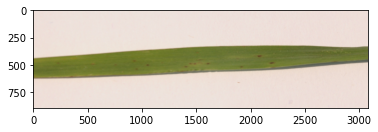

In [3]:
imre = plt.imread("/kaggle/input/rice-leaf-diseases/rice_leaf_diseases/Leaf smut/DSC_0336.jpg")
img = plt.imshow(imre)

In [4]:
imre.shape

(897, 3081, 3)

In [5]:
label = []
image = []
image_width = 500
image_height = 500

# First loop for label names
# secound lopp for image names 
for i in os.listdir("/kaggle/input/rice-leaf-diseases/rice_leaf_diseases/"):
        for j in  os.listdir("/kaggle/input/rice-leaf-diseases/rice_leaf_diseases/"+i):
            img = cv2.imread("/kaggle/input/rice-leaf-diseases/rice_leaf_diseases/"+i+"/"+j)
            img = cv2.resize(img,(image_width,image_height))
            label.append(i)
            image.append(img)
                
x = np.array(image)
y = np.array(label)

x.shape , y.shape

((120, 500, 500, 3), (120,))

In [6]:
encode = LabelEncoder()
y = encode.fit_transform(y)

In [7]:
x_train , x_test, y_train,y_test = train_test_split(x,y,test_size=0.2,stratify=y,random_state=10)

In [8]:
# Scale value
x_train = x_train/255
x_test = x_test/255

In [9]:
# Data Augmentation
data_agu = keras.Sequential([
            keras.layers.experimental.preprocessing.RandomFlip(),
            keras.layers.experimental.preprocessing.RandomRotation(0.4),
            keras.layers.experimental.preprocessing.RandomContrast(0.4)
            ])

2022-09-30 04:20:14.571546: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-30 04:20:14.686154: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-30 04:20:14.686974: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-30 04:20:14.688585: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

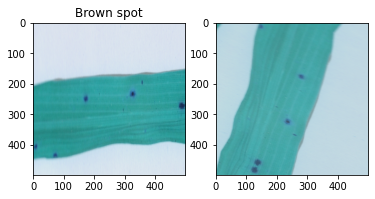

In [10]:
# Orignal Image
plt.subplot(1,2,1)
plt.imshow(x[0])
plt.title(label[0])

# Data Agumentataion Applayed Image
plt.subplot(1,2,2)
plt.imshow(data_agu(x)[0])

In [11]:
model = Sequential([
    data_agu,
    Conv2D(16, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(200, activation='relu'),
    Dense(3)
])

In [12]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
epoch=100
history = model.fit(x_train[:80],y_train[:80],epochs=epoch,verbose=0, validation_data=(x_train[80:],y_train[80:]))

2022-09-30 04:20:18.983854: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
2022-09-30 04:20:21.078861: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


In [13]:
model.evaluate(x_test,y_test)

1/1 [==============================] - 0s 306ms/step - loss: 0.8933 - accuracy: 0.7500


[0.8932701945304871, 0.75]

In [14]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

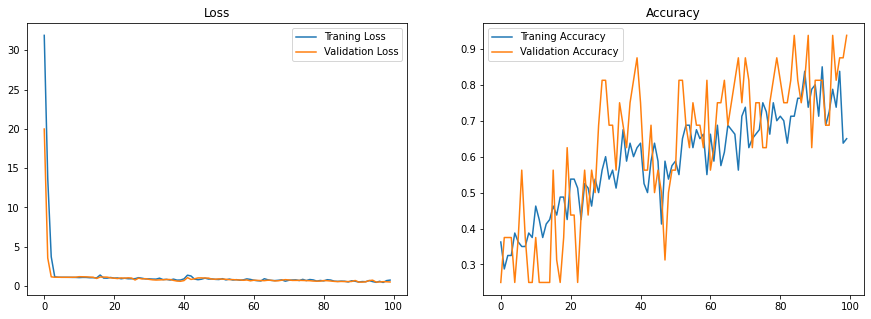

In [15]:
loss = history.history["loss"]
val_loss = history.history["val_loss"]
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(range(epoch),loss,label="Traning Loss")
plt.plot(range(epoch),val_loss,label="Validation Loss")
plt.title("Loss")
plt.legend()

plt.subplot(1,2,2)
plt.plot(range(epoch),accuracy,label="Traning Accuracy")
plt.plot(range(epoch),val_accuracy,label="Validation Accuracy")
plt.title("Accuracy")
plt.legend()

# **Prediction**

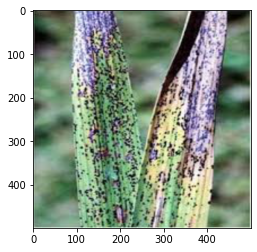

Pridicted Label  2
['Leaf smut']


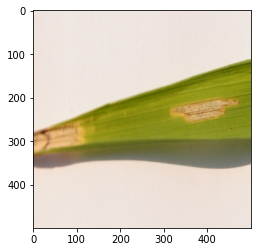

Pridicted Label  2
['Leaf smut']


In [16]:
from skimage import io

urls = ["https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRz0zUAIvitgPs4-0zsFdH1gzJqZ_6z8YCOjg&usqp=CAU",
        "/kaggle/input/rice-leaf-diseases/rice_leaf_diseases/Bacterial leaf blight/DSC_0373.JPG"   
       ]

for i in urls:
    try_image = io.imread(i)
    try_image = cv2.resize(try_image,(image_width,image_height))
    try_image = try_image/255
    plt.imshow(try_image)
    plt.show()
    try_image = try_image.reshape(1,image_width,image_height,3)

    # If Png Image , that is 4 channel image so convert into 3 channel
    #convert the image from RGBA2RGB
    if len(try_image.shape) > 2 and try_image.shape[2] == 4:
        q = cv2.cvtColor(try_image, cv2.COLOR_BGRA2BGR)
        pridiction = np.argmax(model.predict([q]))

    else:
        pridiction = np.argmax(model.predict([try_image]))

    print("Pridicted Label ",pridiction)
    print(encode.inverse_transform([pridiction]))